# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1

For every column in the data: 
- State whether the values match the description given in the table above. 
- State the number of missing values in the column. 
- Describe what you did to make values match the description if they did not match.

In this case, missing values were represented as "NA".

1. **claim_id**: 
- The column contains 2000 numerical values, and this ones match the  given description: Nominal numerical values.
- This is the unique identifier of the claim, it doesn't have missing values due to the database structure, so no changes were made.
- The column contains 2000 numerical values ranging from 0001 to 2000

2. **time_to_close**: 
- There are 256 unique values and no missing values. No changes were made to this column.
- The values match the description: Discrete and any positive value.
- The column contains 2000 numerical values ranging from 76 to 518

3. **claim_amount**: 
- There are 2000 unique values, so every initial amount requested per claim is unique for every case. There are no missing values. 
- The data don't match the description, because it's described as continuos, but in the column it's shown as _string_. This string contains two non-numerical characters in the beggining of the observation and a blank space ('R$ '), then followed by numbers. 
- The two non-numerical characters and blank space were removed, and changed the string type to numeric, giving place to a full continuos numerical data rounded to 2 decimal places.
- The column contains 2000 numerical values ranging from 1637.94 to 76106.80

4. **amount_paid**: 
- There are 1964 unique values. There are 36 missing values. The missing values were replaced with the overall median wich is _20105.70_
- The data don't match the description, because it's described as continuos, but in the column it's shown as _string_. This was changed from the string type of data to numeric, so the column became a continuous numerical value rounded to 2 decimal places.  
- The column contains 1964 numerical values ranging from 1516.72 to 52498.75

5. **location**: 
- The values match the description: A nominal string value.
- There are 4 distinct values, this are ``RECIFE``, ``SAO LUIS``, ``FORTALEZA`` and ``NATAL``. There are no missing values 
- No changes were made to this column.

6. **individuals_on_claims**: 
- There are 15 unique values. 
- The column contains 2000 numerical values ranging from 1 to 15
- This matches the description, discrete values. This are the number of individuals by claim and minimum is 1 person.


7. **linked_cases**: 
- The values match the description: A nominal value.
- There are 2 distinct values, this are `TRUE` and `FALSE`.
- The column contains 1974 nominal values. 
- There are 26 missing values in this column, so this missing values were replaced with `FALSE`. 


8. **cause**: 
- There are no missing values. 
- There are 5 distinct values, this are `vegetable`, `meat`, `unknown`, `Meat` and `VEGETABLES`. This don't match the data description because there should be only 3 distinct values (`vegetable`, `meat`, `unknown`).
- The values `Meat` and `VEGETABLES` were changed to fit the data description into `meat` and `vegetable` respectively, applying lower case to all the colum and removing the final 's' in `VEGETABLES`.
- The column contains 2000 nominal values. 
- There are 0 missing values in this column.

In [37]:
CREATE TEMP TABLE claims AS
	SELECT claim_id,
		   time_to_close,
		   claim_amount AS original_claim_amount,
		   claim_amount AS new_claim_amount,
		   amount_paid AS original_amount_paid,
		   amount_paid AS new_amount_paid,
		   location,
		   individuals_on_claim,
		   linked_cases AS original_linked_cases,
		   linked_cases AS new_linked_cases,
		   cause AS original_cause,
		   cause AS new_cause
	FROM 'food_claims_2212.csv'; 
	

UPDATE claims
	SET new_cause = 'vegetable'
WHERE new_cause LIKE '%VEGETABLES%';

UPDATE claims
	SET new_cause = 'meat'
WHERE new_cause LIKE '%Meat%';

UPDATE claims
	SET new_linked_cases = REPLACE(new_linked_cases, 'NA', 'FALSE');
	
UPDATE claims
	SET new_claim_amount = LTRIM(new_claim_amount, 'R$ ');
	
UPDATE claims
	SET new_amount_paid = REPLACE(new_amount_paid, 'NA', NULL)
WHERE new_amount_paid LIKE '%NA%';
  

SELECT claim_id, 
	   time_to_close, 
	   new_claim_amount::NUMERIC AS new_claim_amount_2,
	   COALESCE(CAST(new_amount_paid AS NUMERIC), 20105.70) AS new_amount_paid2,
       location, 
	   individuals_on_claim, 
	   new_linked_cases, 
	   new_cause
FROM claims; 

,claim_id,time_to_close,new_claim_amount_2,new_amount_paid2,location,individuals_on_claim,new_linked_cases,new_cause
0,0001,317,74474.55,51231.37,RECIFE,15,FALSE,unknown
1,0002,195,52137.83,42111.30,FORTALEZA,12,TRUE,unknown
2,0003,183,24447.20,23986.30,SAO LUIS,10,TRUE,meat
3,0004,186,29006.28,27942.72,FORTALEZA,11,FALSE,meat
4,0005,138,19520.60,16251.06,RECIFE,11,FALSE,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,FALSE,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,TRUE,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,TRUE,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,FALSE,meat


## Task 2

Create a visualization that shows the number of claims in each location. Use the visualization to: 
- State which category of the variable location has the most observations 
- Explain whether the observations are balanced across categories of the variable location

There are 4 unique locations were the legal team processes claims. 

The location where most of the claims are processed is `RECIFE`, with almost 900 claims (885), followed by `SAO LUIS` with a significat decrease of claims proccesed (517). Next are `FORTALEZA` and `NATAL` with 311 and 287 claims respectively. 

The observations are not balanced across locations, so the legal team should research why are more claims processeced in `RECIFE` and `SAO LUIS` rather than `FORTALEZA` and `NATAL`.

![](count_locations.png)

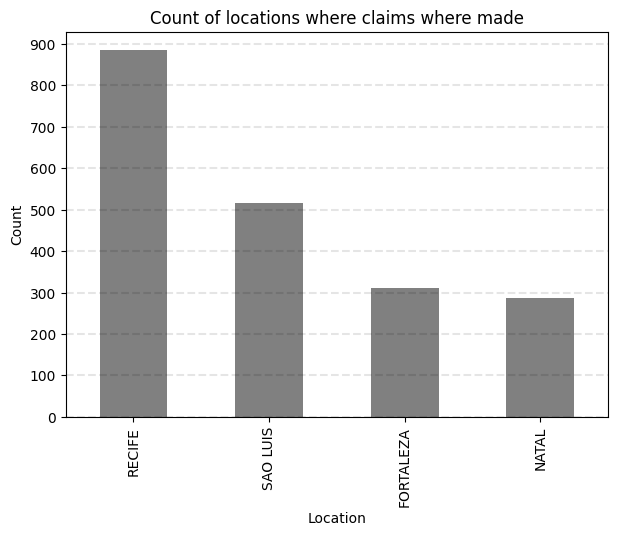

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

df['location'].value_counts().plot(kind='bar', color='gray', figsize=(7,5))
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of locations where claims where made')
plt.grid(color='black', linestyle='--', linewidth=1.5, axis='y', alpha=0.1)
plt.yticks(range(0,1000,100))
plt.show()

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

Most of the data is placed between 150 and 250 days for the claims to solve. 

The average days to solve claims is 185.57, so it's consistent with the distribution, because the peak of claims (above 400) were solve around 170 and 190 days. 

The data is unimodal and right skewed, so most of the data is on the lower right side, with some outliers. This can be shown by the mean being bigger than the media and the media being bigger than the mode (mean > median > mode in this case would be 185.57 > 179 > 176). 

The legal team should focus on the claims that takes most time to close, and the locations where this happens. 

![](distribution_of_time.png)

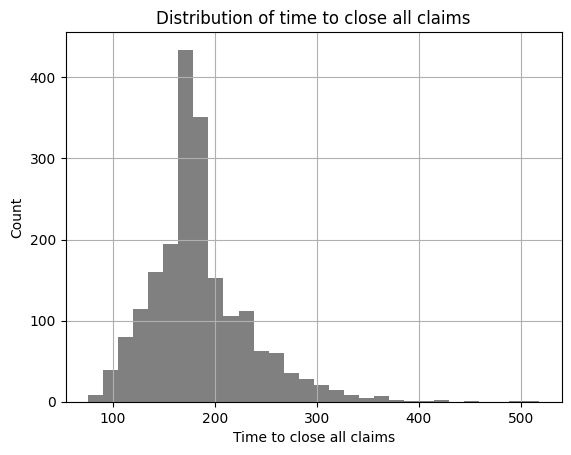

In [46]:
df['time_to_close'].hist(bins = 30, facecolor='gray')
plt.xlabel('Time to close all claims')
plt.ylabel('Count')
plt.title('Distribution of time to close all claims')
#plt.yticks(range(0,60,10))
#plt.xticks(range(0,600,40))
plt.show()

## Task 4

Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

To combine all the information from above we see the relationship between the two variables "Time to close" and "Locations". We can see in the following graphic that at first sight all locations have same time for resolving claims, but have outliers that can affect the data visualization. The maximum outlier belongs to Sao Luis with 518 days to resolve a claim and the minimum outlier belongs to fortaleza with 76 days to resolve a claim. We can remove this outliers to see the data more clearly.

![](boxplot_outliers.png)

Now, without the outliers, we can see that despite that Recife is the location with more claims,  all locations have almost same maximun, minimum and median time to solve this. Sao Luis is the second place with most of the claims and have slightly differents results. 
So, with this information, for the legal team to improve how long it takes to reply to customers and close claims, they should look the cases that are apart from the most of the data (the outliers), so they can see what happened in those cases. For example, what happened in the case that took 518 days to solve, how they can learn from that case and improve the time to solve claims in the other locations, and what they have been doing good in the case that took 76 days to solve in Fortaleza.

![](boxplot_no_outliers.png)


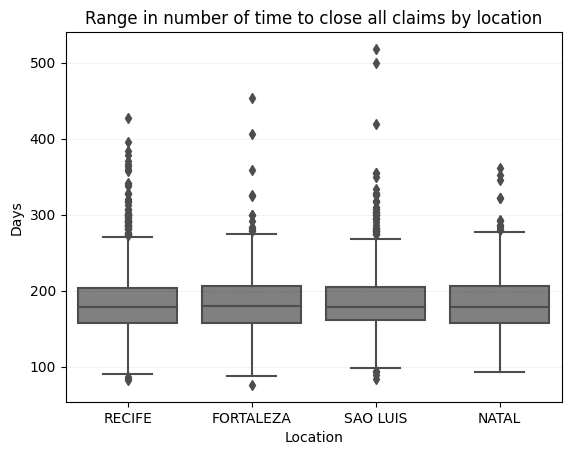

In [47]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


sns.boxplot(x=df['location'], y=df['time_to_close'], data=df, color='gray').set(title='Range in number of time to close all claims by location')
plt.xlabel('Location')
plt.ylabel('Days')
plt.grid(color='black', linestyle='--', linewidth=.5, axis='y', alpha=0.1)
plt.show()


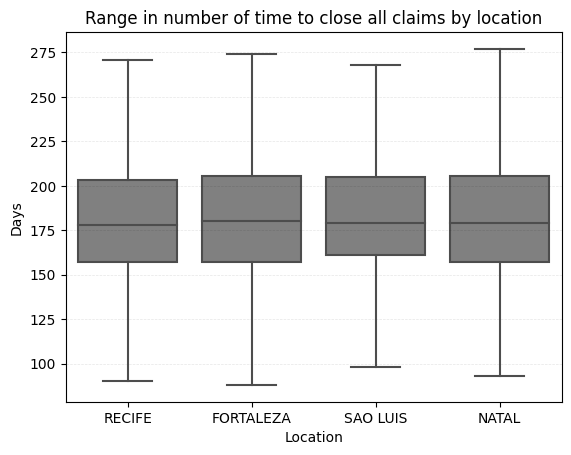

In [48]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


sns.boxplot(x=df['location'], y=df['time_to_close'], data=df, showfliers=False, color='gray').set(title='Range in number of time to close all claims by location')
plt.xlabel('Location')
plt.ylabel('Days')
plt.grid(color='black', linestyle='--', linewidth=.5, axis='y', alpha=0.1)
plt.show()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam